In [2]:

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pacer/anaconda3/envs/cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pacer/anaconda3/envs/cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pacer/anaconda3/envs/cuda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pacer/anaconda3/envs/cu

In [5]:
mask = '/home/Documents/dataset/face_mask/croped_mask'
no_mask = '/home/Documents/dataset/face_mask/croped_no_mask'


images = []
for file in list(os.listdir(mask)):
    images.append(cv2.imread(mask+'/'+file))
    
for file in list(os.listdir(no_mask)):
    images.append(cv2.imread(no_mask+'/'+file)) 
    
images = np.array(images)


In [6]:
'''
1,0 ->  with mask
0,1 -> no mask
'''
n_mask = len(list(os.listdir(mask)))
n_no_mask = len(list(os.listdir(no_mask)))
labels = np.zeros(( n_mask  + n_no_mask, 2  ))
labels[:n_mask,0] = 1
labels[n_mask:,1] = 1
print('y shape',labels.shape)
print('x shape',images.shape)

y shape (2757, 2)
x shape (2757, 160, 160, 3)


In [8]:
from random import shuffle
data_size = labels.shape[0]
index = list(range(data_size))
shuffle(index)
index = np.array(index)

images =   images[index]
labels =   labels[index,:]

x_train =  images[:int(0.8*data_size)]
y_train =  labels[:int(0.8*data_size),:] 

x_test =   images[int(0.8*data_size):]
y_test =   labels[int(0.8*data_size):,:]


no mask


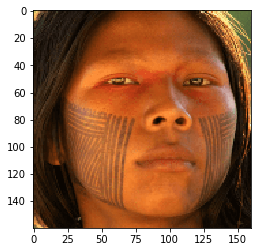

In [21]:
from random import randint
i = randint(0, len(x_test))
plt.imshow(x_test[i][:,:,::-1])
print((np.array(['with mask','no mask'])[y_test[i] == 1])[0])


In [65]:
img_rows, img_cols = 160, 160
input_shape = (img_rows, img_cols, 3)
batch_size = 1
num_classes = 2
epochs = 25

In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

#model.summary()

In [76]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=19,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2205 samples, validate on 552 samples
Epoch 1/19
2205/2205 [==============================] - 15s 7ms/step - loss: 0.9975 - accuracy: 0.6730 - val_loss: 0.6279 - val_accuracy: 0.6884
Epoch 2/19
2205/2205 [==============================] - 14s 7ms/step - loss: 0.7882 - accuracy: 0.6893 - val_loss: 0.6931 - val_accuracy: 0.6757
Epoch 3/19
2205/2205 [==============================] - 14s 7ms/step - loss: 0.6024 - accuracy: 0.7732 - val_loss: 0.7760 - val_accuracy: 0.7120
Epoch 4/19
2205/2205 [==============================] - 15s 7ms/step - loss: 0.6039 - accuracy: 0.8009 - val_loss: 0.5998 - val_accuracy: 0.6793
Epoch 5/19
2205/2205 [==============================] - 15s 7ms/step - loss: 0.3184 - accuracy: 0.8807 - val_loss: 0.2316 - val_accuracy: 0.9239
Epoch 6/19
2205/2205 [==============================] - 15s 7ms/step - loss: 0.2414 - accuracy: 0.9161 - val_loss: 0.2483 - val_accuracy: 0.9022
Epoch 7/19
2205/2205 [==============================] - 15s 7ms/step - loss: 0.1901

In [77]:
# Save the model
model.save('face_mask.h5')

In [16]:
# Recreate the exact same model purely from the file
new_model = keras.models.load_model('face_mask.h5')

['no mask']


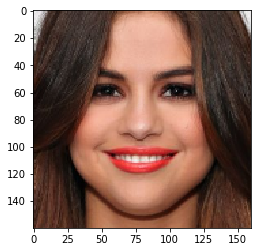

In [18]:
from random import randint
i = randint(0, 552)
m = new_model.predict(x_test[i].reshape(-1,160,160,3)) == new_model.predict(x_test[i].reshape(-1,160,160,3)).max()
plt.imshow(x_test[i][:,:,::-1])
print(np.array(['with mask','no mask'])[m[0]])